<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/ANN_Regression_selected_Features_20231221.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pandas as read_csv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold



In [2]:
data = pd.read_csv("2023_one hours__normal_on_state2_Selected_Feature.csv",  parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

data.head()

,Gt Exhaust Outlet Temp,GT Fuel Gas Mass Flow,GT Gross MW,GT Compres Inlet Temp,GT IGV Position,GT Turbine Inlet Temperature,GT Swirl Angle,GT Efficiency Actual (LHV),Combust Monitor Actual Spread 2,GT Exhaust Gas Flow - HB,...,Turb Exhaust T/C 23,Turb Exhaust T/C 24,Turb Exhaust T/C 25,Turb Exhaust T/C 26,Turb Exhaust T/C 27,Turb Exhaust T/C 28,Turb Exhaust T/C 29,Turb Exhaust T/C 30,Turb Exhaust T/C 31,Combust Monitor Actual Spread 1
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-01-20 17:00:00,611.855,13.760,231.782,18.940,87.999,1255.732,14.534,34.919,31.110,650.398,...,608.536,605.209,601.492,610.876,615.695,628.713,611.376,604.494,619.819,32.684
2023-01-20 18:00:00,604.004,13.175,226.570,18.938,84.113,1244.014,19.430,35.239,24.820,635.450,...,606.971,595.928,589.052,595.202,609.593,616.492,608.235,600.413,600.202,32.458
2023-01-20 19:00:00,637.918,11.979,207.629,18.780,65.027,1284.943,38.101,35.913,27.752,531.246,...,637.373,643.240,637.800,623.243,636.460,648.020,645.099,648.190,637.079,34.742
2023-01-20 20:00:00,636.447,12.306,212.659,18.626,67.205,1283.541,33.234,35.783,28.361,548.814,...,632.764,648.446,627.277,618.795,641.789,640.982,649.530,641.044,630.275,35.122
2023-01-20 21:00:00,637.513,11.290,193.451,17.743,60.577,1270.635,51.623,35.513,15.186,504.648,...,636.851,641.639,638.126,639.001,628.511,633.543,643.794,639.210,642.735,19.609


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2743 entries, 2023-01-20 17:00:00 to 2023-10-29 22:00:00
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Gt Exhaust Outlet Temp           2743 non-null   float64
 1   GT Fuel Gas Mass Flow            2743 non-null   float64
 2   GT Gross MW                      2743 non-null   float64
 3   GT Compres Inlet Temp            2743 non-null   float64
 4   GT IGV Position                  2743 non-null   float64
 5   GT Turbine Inlet Temperature     2743 non-null   float64
 6   GT Swirl Angle                   2743 non-null   float64
 7   GT Efficiency Actual (LHV)       2743 non-null   float64
 8   Combust Monitor Actual Spread 2  2743 non-null   float64
 9   GT Exhaust Gas Flow - HB         2743 non-null   float64
 10  Combust Monitor Actual Spread 3  2743 non-null   float64
 11  Turb Exhaust T/C 2               2743 non-null

In [4]:
import pickle

def save_object(obj , name):
    pickle_obj = open(f"{name}.pck","wb")
    pickle.dump(obj, pickle_obj)
    pickle_obj.close()

In [5]:
remaining_columns = list(data.columns)
remaining_columns.remove("Combust Monitor Actual Spread 1")

In [6]:
X = data[remaining_columns].values
Y = data['Combust Monitor Actual Spread 1'].values

In [7]:
data.columns

Index(['Gt Exhaust Outlet Temp', 'GT Fuel Gas Mass Flow', 'GT Gross MW',
       'GT Compres Inlet Temp', 'GT IGV Position',
       'GT Turbine Inlet Temperature', 'GT Swirl Angle',
       'GT Efficiency Actual (LHV)', 'Combust Monitor Actual Spread 2',
       'GT Exhaust Gas Flow - HB', 'Combust Monitor Actual Spread 3',
       'Turb Exhaust T/C 2', 'Turb Exhaust T/C 3', 'Turb Exhaust T/C 4',
       'Turb Exhaust T/C 5', 'Turb Exhaust T/C 6', 'Turb Exhaust T/C 7',
       'Turb Exhaust T/C 8', 'Turb Exhaust T/C 9', 'Turb Exhaust T/C 10',
       'Turb Exhaust T/C 11', 'Turb Exhaust T/C 13', 'Turb Exhaust T/C 14',
       'Turb Exhaust T/C 16', 'Turb Exhaust T/C 17', 'Turb Exhaust T/C 18',
       'Turb Exhaust T/C 19', 'Turb Exhaust T/C 20', 'Turb Exhaust T/C 21',
       'Turb Exhaust T/C 22', 'Turb Exhaust T/C 23', 'Turb Exhaust T/C 24',
       'Turb Exhaust T/C 25', 'Turb Exhaust T/C 26', 'Turb Exhaust T/C 27',
       'Turb Exhaust T/C 28', 'Turb Exhaust T/C 29', 'Turb Exhaust T/C 30',
 

In [8]:
Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [9]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(Xtrain)

Xtrain_scaled = scaler.transform(Xtrain)
Xtest_scaled = scaler.transform(Xtest)

In [10]:
save_object(scaler,"scaler")

In [11]:
# Imported Network designed in previous lesson

# Start your model with Sequential Object
model = tf.keras.models.Sequential()
# Next add in your Input object and Specify the Dimension you want to pass in
model.add(tf.keras.Input(shape=(39,)))
# Add in your Neurons of 1st layer
model.add(tf.keras.layers.Dense(1000, activation='sigmoid'))
# 2nd layer
model.add(tf.keras.layers.Dense(500, activation='sigmoid'))

model.add(tf.keras.layers.Dense(1 , activation='linear'))


Optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(Optimizer, loss="mean_squared_error", metrics=["mae"])


# print summary to undertstand your neural network flow
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              40000     
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 541001 (2.06 MB)
Trainable params: 541001 (2.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
history = model.fit(Xtrain_scaled , Ytrain , validation_data=(Xtest_scaled , Ytest) , epochs=1000)

Epoch 1/1000
69/69 [==============================] - 3s 6ms/step - loss: 101.6050 - mae: 8.1292 - val_loss: 17.4655 - val_mae: 3.4376
Epoch 2/1000
69/69 [==============================] - 0s 3ms/step - loss: 13.6884 - mae: 2.7936 - val_loss: 14.4922 - val_mae: 2.8019
Epoch 3/1000
69/69 [==============================] - 0s 3ms/step - loss: 8.1521 - mae: 2.1320 - val_loss: 6.4733 - val_mae: 1.8802
Epoch 4/1000
69/69 [==============================] - 0s 4ms/step - loss: 5.1920 - mae: 1.7462 - val_loss: 5.9088 - val_mae: 1.7819
Epoch 5/1000
69/69 [==============================] - 0s 3ms/step - loss: 4.8586 - mae: 1.6778 - val_loss: 5.7111 - val_mae: 1.7438
Epoch 6/1000
69/69 [==============================] - 0s 3ms/step - loss: 4.7067 - mae: 1.6564 - val_loss: 5.5984 - val_mae: 1.7254
Epoch 7/1000
69/69 [==============================] - 0s 3ms/step - loss: 4.5863 - mae: 1.6335 - val_loss: 5.4807 - val_mae: 1.7108
Epoch 8/1000
69/69 [==============================] - 0s 3ms/step - los

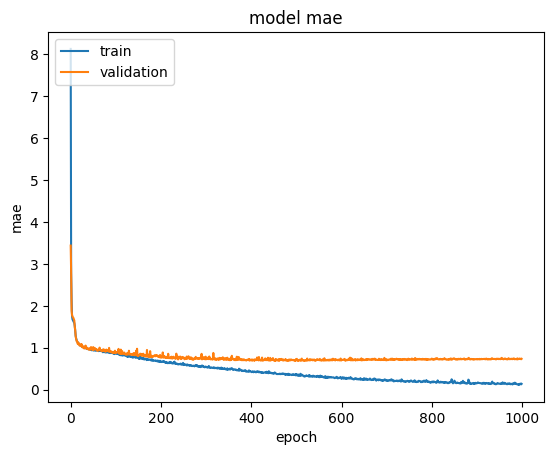

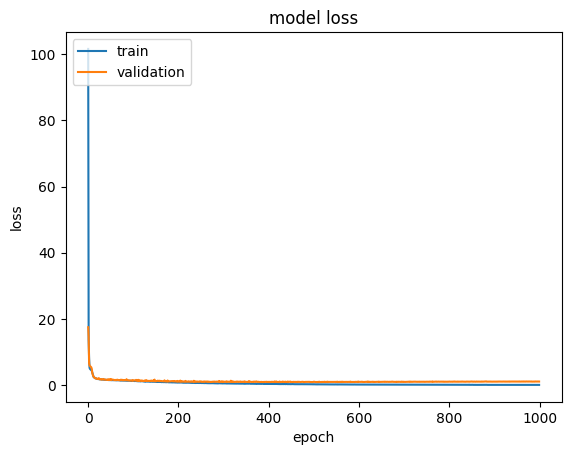

In [13]:
#  "Accuracy Plot"
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mae')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# "Loss Plot"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [91]:
#Predict on test data
predictions = model.predict(Xtest_scaled[:5])
print("predicted values are:", predictions)
print("Real values are: ", Ytest[:5])

1/1 [==============================] - 0s 18ms/step
predicted values are: [[29.025381]
 [27.990553]
 [29.78232 ]
 [28.494236]
 [28.890373]]
Real values are:  [28.169 27.563 29.515 27.428 29.993]


In [92]:
mse_neural,mae_neural = model.evaluate(Xtest_scaled,Ytest)
print("Mean squared error from neural net:", mse_neural)
print("Mean absolute error from neural net ", mae_neural)

18/18 [==============================] - 0s 2ms/step - loss: 1.0459 - mae: 0.7365
Mean squared error from neural net: 1.0459208488464355
Mean absolute error from neural net  0.7365389466285706


In [16]:
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

Linear regression

In [93]:
lr_model_linear = linear_model.LinearRegression()
lr_model_linear.fit(Xtrain_scaled , Ytrain)
Ypred_lr = model.predict(Xtest_scaled)

mse_lr = mean_squared_error(Ytest,Ypred_lr)
mae_lr = mean_absolute_error(Ytest,Ypred_lr)
print(" Mean squared error from linear regression : " , mse_lr)
print(" Mean absolute error from linear regression : " , mae_lr)

18/18 [==============================] - 0s 2ms/step
 Mean squared error from linear regression :  1.0459209160618592
 Mean absolute error from linear regression :  0.7365390762718215


In [18]:
lr_model_linear.coef_

array([ 1.99330456, -0.46392492, -0.074285  , -0.13058981, -2.8027378 ,
       -0.2698787 , -0.00913999,  0.51779674,  0.89675477,  2.97207109,
        0.54544638,  0.84677348,  0.59844477,  0.66765061, -0.35967527,
        0.50050771, -0.59486257, -0.79742832, -0.46854085, -3.92187636,
       -2.13226225, -0.00825891,  0.26605145,  0.81198666, -0.60428986,
        0.2407348 ,  1.41342007, -1.72451606,  0.7833479 ,  1.54183248,
       -0.66821493, -0.85169348,  1.13788892,  0.38923322, -0.67504557,
        0.94881924, -0.48051969,  0.11524846, -0.33001355])

In [19]:
lr_model_linear.intercept_

28.213369644484526

In [20]:
lr_model_linear.score(Xtest_scaled , Ytest)

0.8895989358845079

Decision tree

In [94]:
tree = DecisionTreeRegressor()
tree.fit(Xtrain_scaled , Ytrain)
Ypred_tree = tree.predict(Xtest_scaled)
mse_dt = mean_squared_error(Ytest,Ypred_tree)
mae_dt = mean_absolute_error(Ytest,Ypred_tree)
print(" Mean squared error using decision tree : " , mse_dt)
print(" Mean absolute error useing decision tree : " , mae_dt)

 Mean squared error using decision tree :  3.3866374918032793
 Mean absolute error useing decision tree :  1.3795063752276866


Random forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=30, random_state=30)
model_rf.fit(Xtrain_scaled , Ytrain)
Ypred_rf = model_rf.predict(Xtest_scaled)
mse_rf = mean_squared_error(Ytest,Ypred_tree)
mae_rf = mean_absolute_error(Ytest,Ypred_tree)
print(" Mean squared error using Random Forest : " , mse_rf)
print(" Mean absolute error using Random Forest : " , mae_rf)

 Mean squared error using Random Forest :  3.3866374918032793
 Mean absolute error using Random Forest :  1.3795063752276866


Feature randking

Text(0, 0.5, 'Importance')

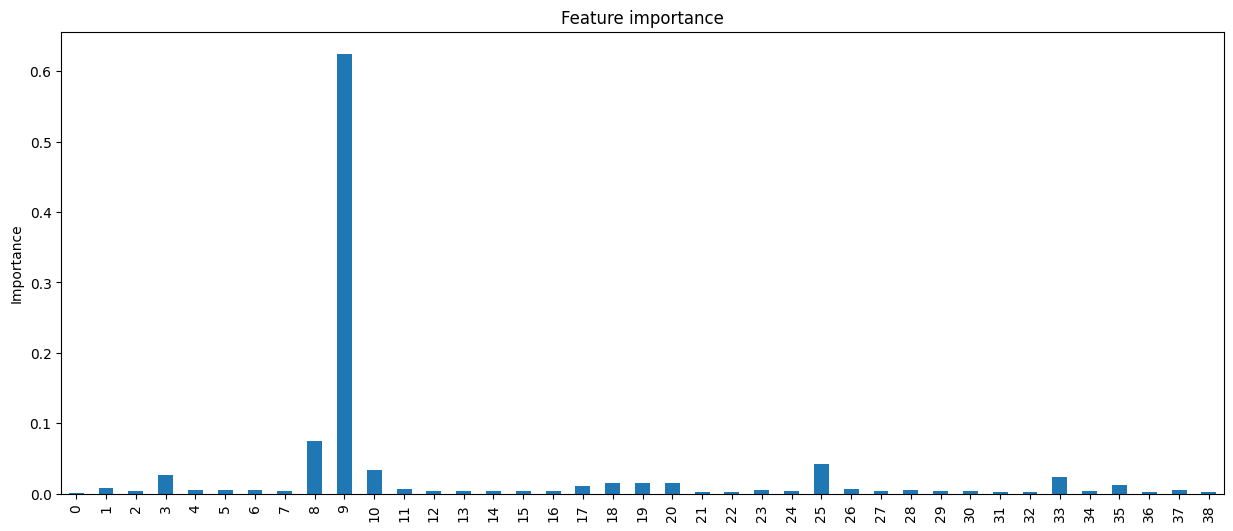

In [96]:
# Let's now plot the feature's importance
# according to the linear model.

# Create series with feature importance.
tmp = pd.Series(np.abs(model_rf.feature_importances_))

# Let's add the variable names.
Xtrain = pd.DataFrame(Xtrain)
tmp.index = Xtrain.columns

# Let's make a bar plot.
tmp.plot.bar(figsize=(15, 6))
plt.title("Feature importance")
plt.ylabel("Importance")

In [97]:
# make sure to import all of our modules
# sklearn package
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# dataframes
import pandas as pd
# computation
import numpy as np
# visualization
import matplotlib.pyplot as plt

# dataset
# https://www.kaggle.com/datasets/ciphernine/brooklyn-real-estate-listings
# place it in the same folder as this workbook
#df = pd.read_csv('brooklyn_listings.csv')

# for this example, we're going to estimate the price with sqft, bathroom, and bedrooms
#df = df[['price','bathrooms','sqft']].dropna()

# show some random lines from our data
#print(df.sample(n=15)

In [104]:
#define our polynomial model, with whatever degree we want
degree=2

# PolynomialFeatures will create a new matrix consisting of all polynomial combinations
# of the features with a degree less than or equal to the degree we just gave the model (2)
poly_model = PolynomialFeatures(degree=degree)

# transform out polynomial features
poly_x_values = poly_model.fit_transform(Xtrain_scaled)

# should be in the form [1, a, b, a^2, ab, b^2]
#print(f'initial values {Xtrain_scaled[0]}\nMapped to {poly_x_values[0]}')

In [105]:
# let's fit the model


poly_model.fit(poly_x_values, Ytrain)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, Ytrain)
y_pred_poly = regression_model.predict(poly_x_values)

regression_model.coef_

mean_squared_error(Ytrain, y_pred_poly, squared=False)

0.5857097029796254

In [106]:
# let's fit the model


poly_model = PolynomialFeatures(degree=degree)

poly_Xtest_values = poly_model.fit_transform(Xtest_scaled)

poly_model.fit(poly_x_values, Ytrain)

# we use linear regression as a base!!! ** sometimes misunderstood **
regression_model = LinearRegression()

regression_model.fit(poly_x_values, Ytrain)
y_pred_poly_test = regression_model.predict(poly_model.fit_transform(Xtest_scaled))

regression_model.coef_

mean_squared_error(Ytest, y_pred_poly_test, squared=False)

2.102059000773104

In [107]:
mse_poly = mean_squared_error(Ytest,y_pred_poly_test)
mae_poly = mean_absolute_error(Ytest,y_pred_poly_test)
print(" Mean squared error from polynomial regression : " , mse_poly)
print(" Mean absolute error from polynomial regression : " , mae_poly)

 Mean squared error from polynomial regression :  4.418652042731221
 Mean absolute error from polynomial regression :  0.9773643347588769


In [108]:
#check our accuracy for each degree, the lower the error the better!
number_degrees = [1]
plt_mean_squared_error = []
for degree in number_degrees:

   poly_model = PolynomialFeatures(degree=degree, include_bias= False)

   poly_x_values = poly_model.fit_transform(Xtrain_scaled)
   poly_model.fit(poly_x_values, Ytrain)

   regression_model = LinearRegression()
   regression_model.fit(poly_x_values, Ytrain)
   y_pred_poly = regression_model.predict(poly_x_values)

   plt_mean_squared_error.append(mean_squared_error(Ytrain, y_pred_poly, squared=False))

   poly_Xtest_values = poly_model.fit_transform(Xtest_scaled)
   y_pred_poly_test = regression_model.predict(poly_x_values)
   mse_poly = mean_squared_error(Ytest,y_pred_poly_test)
   mae_poly = mean_absolute_error(Ytest,y_pred_poly_test)
   print(" Mean squared error from polynomial regression : " , mse_poly)
   print(" Mean absolute error from polynomial regression : " , mae_poly)



#plt.scatter(number_degrees,plt_mean_squared_error, color="green")
#plt.plot(number_degrees,plt_mean_squared_error, color="red")




ValueError: ignored

In [62]:
regression_model.coef_


array([ 1.99330456, -0.46392492, -0.074285  , -0.13058981, -2.8027378 ,
       -0.2698787 , -0.00913999,  0.51779674,  0.89675477,  2.97207109,
        0.54544638,  0.84677348,  0.59844477,  0.66765061, -0.35967527,
        0.50050771, -0.59486257, -0.79742832, -0.46854085, -3.92187636,
       -2.13226225, -0.00825891,  0.26605145,  0.81198666, -0.60428986,
        0.2407348 ,  1.41342007, -1.72451606,  0.7833479 ,  1.54183248,
       -0.66821493, -0.85169348,  1.13788892,  0.38923322, -0.67504557,
        0.94881924, -0.48051969,  0.11524846, -0.33001355])

In [58]:
regression_model.intercept_

28.213369644484526